In [4]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests
import copy
import os
%matplotlib inline

In [8]:
from transformers.dynamic_module_utils import get_imports
from unittest.mock import patch

def fixed_get_imports(filename: str | os.PathLike) -> list[str]:
    """Work around for https://huggingface.co/microsoft/phi-1_5/discussions/72."""
    if not str(filename).endswith("/modeling_florence2.py"):
        return get_imports(filename)
    imports = get_imports(filename)
    imports.remove("flash_attn")
    return imports


In [10]:
model_id = 'microsoft/Florence-2-large-ft'
with patch("transformers.dynamic_module_utils.get_imports", fixed_get_imports):
        model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-base-ft", trust_remote_code=True)
        processor = AutoProcessor.from_pretrained("microsoft/Florence-2-base-ft", trust_remote_code=True)

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/Users/sarathmenon/.cache/huggingface/modules/transformers_modules/microsoft/Florence-2-base-ft/e7a5acc73559546de6e12ec0319cd7cc1fa2437c/processing_florence2.py:499: SyntaxWarning: invalid escape sequence '\d'
  """


In [11]:
def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')


    # Show the plot
    plt.show()

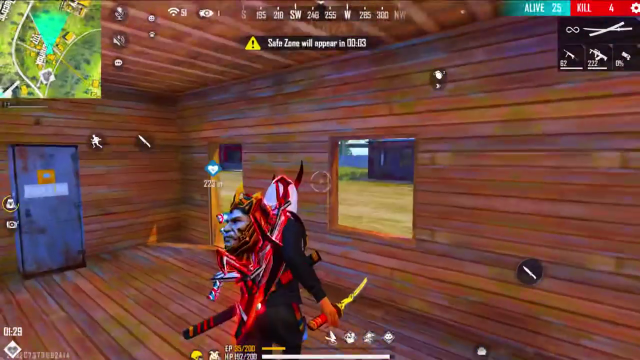

In [27]:
# url = "https://gamemusic.net/wp-content/uploads/2019/06/POPTrilogy_WW_04-1024x576-800x450.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open("/Users/sarathmenon/Documents/master_thesis/datasets/game_dataset/raw/free_fire/1.png")
image

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[305.6000061035156, 275.58001708984375, 369.6000061035156, 332.1000061035156]], 'labels': ['the sword']}}


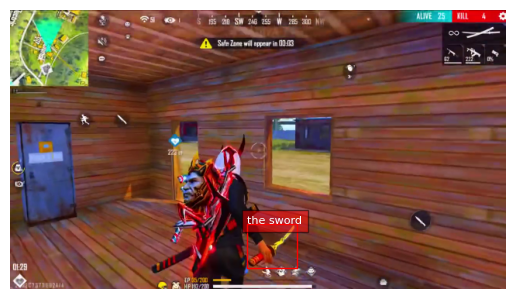

In [29]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="Locate the sword")
print(results)
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[8.0, 142.3800048828125, 88.0, 278.1000061035156]], 'labels': ['the door']}}


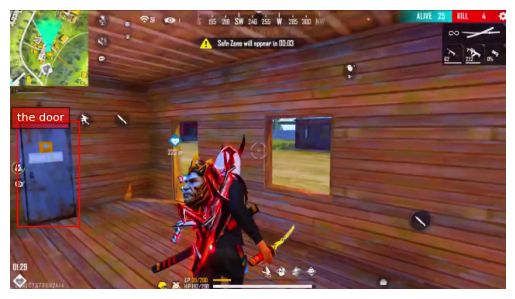

In [30]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="Locate the door")
print(results)
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[328.6399841308594, 134.82000732421875, 416.9599914550781, 243.90000915527344]], 'labels': ['the window']}}


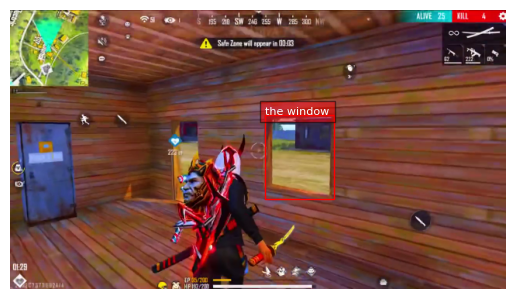

In [31]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="Locate the window")
print(results)
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])